In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import pandas as pd
import numpy as np

import xgboost as xgb
from sklearn import ensemble
from sklearn.preprocessing import StandardScaler

plt.figure(figsize(10,5))

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

In [3]:
data = pd.read_csv('transposed.csv')

In [4]:
data['gender'] = data['gender'].apply(lambda x: 1 if (x == 'Мужской') else 0)
data.head()

,record_id,id,date,days,gender,age,27,28,37,42,43,68,76,89,65,119,67,107,diabetes
0,1,69,15806,466,1,59,7.29,33.40,4.02,30.5,47.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1,2,69,15825,485,1,59,7.16,24.57,4.08,39.7,54.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,3,69,15849,509,1,59,6.65,24.95,NaN,34.5,50.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
3,4,109,15742,402,0,58,6.14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
4,5,109,16611,1271,0,60,6.05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


In [5]:
data.shape

(41040, 19)

In [6]:
df = data[data['27'].isna() == False]
df = df.drop(['68','76','89','65','119','67','107'], axis=1)
df = df.dropna()

In [7]:
df.shape

(12175, 12)

In [8]:
df.head()

,record_id,id,date,days,gender,age,27,28,37,42,43,diabetes
0,1,69,15806,466,1,59,7.29,33.40,4.02,30.5,47.6,1
1,2,69,15825,485,1,59,7.16,24.57,4.08,39.7,54.4,1
8,9,178,16871,1531,1,46,4.70,12.87,5.05,34.3,72.4,0
9,10,217,15865,525,1,47,6.30,10.38,6.46,23.8,28.5,1
10,11,217,16417,1077,1,48,5.82,15.26,5.81,32.4,37.4,1


In [9]:
X = df[['gender', 'age', '28', '37', '42', '43']].values
y = df['diabetes'].values

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, StratifiedKFold
import warnings
warnings.filterwarnings('ignore')
skf = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
logit = LogisticRegression(n_jobs=-1, random_state=42)

In [11]:
score = cross_val_score(estimator=logit, X=X, y=y, cv=skf, scoring='accuracy')
score.mean()

0.67293661712996

In [12]:
logit.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn', n_jobs=-1,
          penalty='l2', random_state=42, solver='warn', tol=0.0001,
          verbose=0, warm_start=False)

In [13]:
logit.coef_

array([[ 5.75077568e-01,  5.29443109e-02,  3.95185440e-04,
         6.38276890e-02, -4.89701448e-03,  7.33633423e-03]])

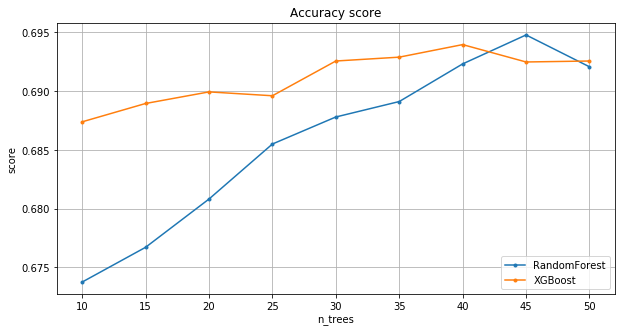

In [14]:
n_trees = range(10, 55, 5)

scoring = []
for n_tree in n_trees:
    estimator = ensemble.RandomForestClassifier(n_estimators = n_tree, min_samples_split=5, random_state=1)
    score = cross_val_score(estimator, X, y, scoring = 'accuracy', cv = skf)    
    scoring.append(score)
scoring = np.asmatrix(scoring)

xgb_scoring = []
for n_tree in n_trees:
    estimator = xgb.XGBClassifier(learning_rate=0.1, max_depth=5, n_estimators=n_tree, min_child_weight=3)
    score = cross_val_score(estimator, X, y, scoring = 'accuracy', cv = skf)    
    xgb_scoring.append(score)
xgb_scoring = np.asmatrix(xgb_scoring)

pylab.plot(n_trees, scoring.mean(axis = 1), marker='.', label='RandomForest')
pylab.plot(n_trees, xgb_scoring.mean(axis = 1), marker='.', label='XGBoost')
pylab.grid(True)
pylab.xlabel('n_trees')
pylab.ylabel('score')
pylab.title('Accuracy score')
pylab.legend(loc='lower right')

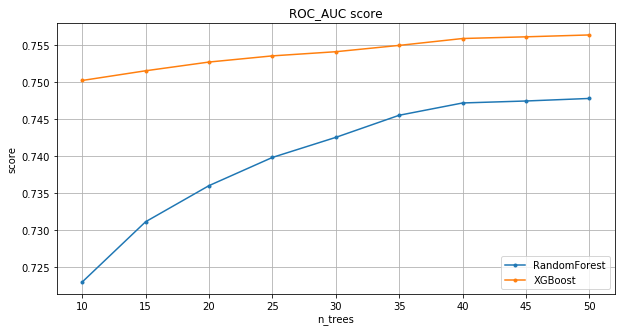

In [15]:
n_trees = range(10, 55, 5)

scoring = []
for n_tree in n_trees:
    estimator = ensemble.RandomForestClassifier(n_estimators = n_tree, min_samples_split=5, random_state=1)
    score = cross_val_score(estimator, X, y, scoring = 'roc_auc', cv = skf)    
    scoring.append(score)
scoring = np.asmatrix(scoring)

xgb_scoring = []
for n_tree in n_trees:
    estimator = xgb.XGBClassifier(learning_rate=0.1, max_depth=5, n_estimators=n_tree, min_child_weight=3)
    score = cross_val_score(estimator, X, y, scoring = 'roc_auc', cv = skf)    
    xgb_scoring.append(score)
xgb_scoring = np.asmatrix(xgb_scoring)


pylab.plot(n_trees, scoring.mean(axis = 1), marker='.', label='RandomForest')
pylab.plot(n_trees, xgb_scoring.mean(axis = 1), marker='.', label='XGBoost')
pylab.grid(True)
pylab.xlabel('n_trees')
pylab.ylabel('score')
pylab.title('ROC_AUC score')
pylab.legend(loc='lower right')

### Trying to clean data

In [16]:
df.head()

,record_id,id,date,days,gender,age,27,28,37,42,43,diabetes
0,1,69,15806,466,1,59,7.29,33.40,4.02,30.5,47.6,1
1,2,69,15825,485,1,59,7.16,24.57,4.08,39.7,54.4,1
8,9,178,16871,1531,1,46,4.70,12.87,5.05,34.3,72.4,0
9,10,217,15865,525,1,47,6.30,10.38,6.46,23.8,28.5,1
10,11,217,16417,1077,1,48,5.82,15.26,5.81,32.4,37.4,1


In [17]:
df2 = df[df['28'] < 70]
df2 = df2[df2['37'] < 15]
df2 = df2[df2['42'] < 250]
df2 = df2[df2['43'] < 400]
print("deleted rows: " + str(df.shape[0] - df2.shape[0]))

deleted rows: 67


In [18]:
X2 = df2[['gender', 'age', '28', '37', '42', '43']].values
y2 = df2['diabetes'].values

In [19]:
X2.shape

(12108, 6)

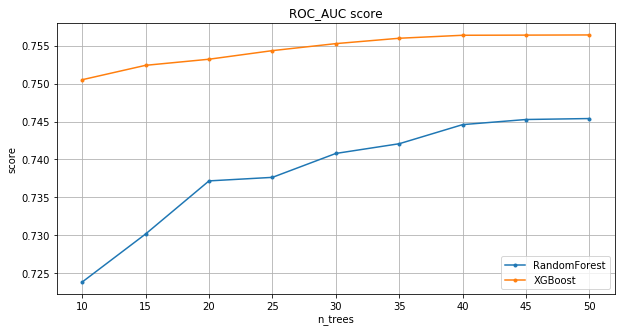

In [20]:
n_trees = range(10, 55, 5)

scoring2 = []
for n_tree in n_trees:
    estimator = ensemble.RandomForestClassifier(n_estimators = n_tree, min_samples_split=5, random_state=1)
    score = cross_val_score(estimator, X2, y2, scoring = 'roc_auc', cv = skf)    
    scoring2.append(score)
scoring2 = np.asmatrix(scoring2)

xgb_scoring2 = []
for n_tree in n_trees:
    estimator = xgb.XGBClassifier(learning_rate=0.1, max_depth=5, n_estimators=n_tree, min_child_weight=3)
    score = cross_val_score(estimator, X2, y2, scoring = 'roc_auc', cv = skf)    
    xgb_scoring2.append(score)
xgb_scoring2 = np.asmatrix(xgb_scoring2)


pylab.plot(n_trees, scoring2.mean(axis = 1), marker='.', label='RandomForest')
pylab.plot(n_trees, xgb_scoring2.mean(axis = 1), marker='.', label='XGBoost')
pylab.grid(True)
pylab.xlabel('n_trees')
pylab.ylabel('score')
pylab.title('ROC_AUC score')
pylab.legend(loc='lower right')

In [24]:
print(scoring.max())
print(scoring2.max())
print(xgb_scoring.max())
print(xgb_scoring2.max())

0.7570325867046165
0.7512694690388043
0.765448377608031
0.7597327241933615
